# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

Импорт необходимых библиотек, изучение общей информации о таблице, для визуализации данных построим гистограмму:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:    
    data = pd.read_csv('real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

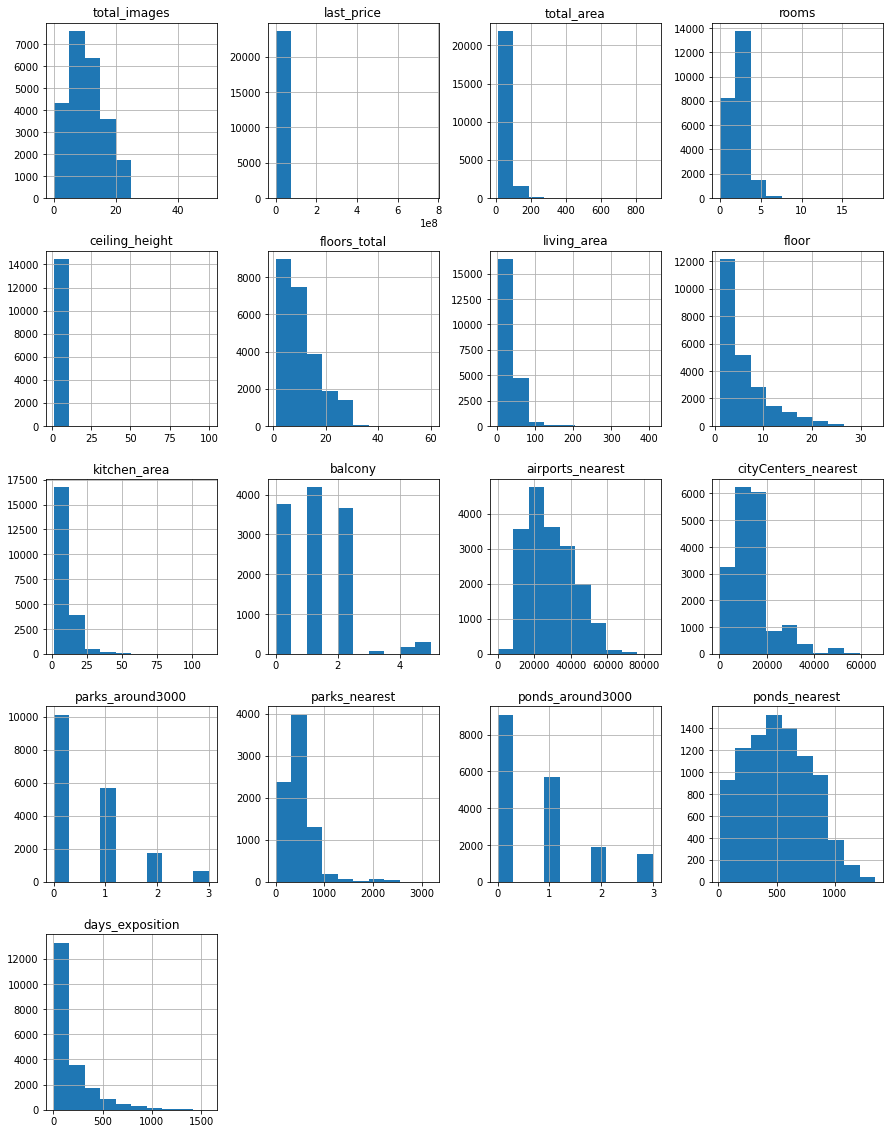

In [2]:
data.hist(figsize=(15, 20));

Вывод: в таблице иммется 22 столбца, в которых представлены различные типы данных - bool, object, int64 и float64.

### Предобработка данных

In [3]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Вывод: в таблице имеется большое количество пропусков, которые необходимо изучить и по возможности убрать для более точного анализа данных.

Столбец balcony:

In [4]:
data['balcony'] = data['balcony'].fillna(0).astype(int)
print('Кол-во пропусков после замены', data['balcony'].isna().sum())

Кол-во пропусков после замены 0


Вывод: если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски следует заменить на 0. 

Столбец is_apartment:

In [5]:
data['is_apartment'].describe()

count      2775
unique        2
top       False
freq       2725
Name: is_apartment, dtype: object

In [6]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype(bool)
print('Кол-во пропусков после замены', data['balcony'].isna().sum())

Кол-во пропусков после замены 0


Вывод: отсутствующие значения появились ввиду того, что продавец не указывал этот параметр. Необходимо заменить все пропуски на значение "False".

Столбец parks_around_3000/parks_around:

Наименования столбцов необходимо привести к привычному виду:

In [7]:
data.rename(columns = {'parks_around3000':'parks_around'}, inplace=True)

In [8]:
data['parks_around'] = data['parks_around'].fillna(0).astype(int)
print('Кол-во пропусков после замены', data['parks_around'].isna().sum())

Кол-во пропусков после замены 0


Вывод: предположительно отсутствующие значения означают, что парков по близости 3000 м. нет, их следует заменить на нулевое значение.

Столбец ponds_around3000/ponds_around:

Наименования столбцов необходимо привести к привычному виду:

In [9]:
data.rename(columns = {'ponds_around3000':'ponds_around'}, inplace=True)

In [10]:
data['ponds_around'] = data['ponds_around'].fillna(0).astype(int)
print('Кол-во пропусков после замены:' , data['ponds_around'].isna().sum())          

Кол-во пропусков после замены: 0


Вывод: предположительно отсутствующие значения означают, что водоемов по близости 3000 м. нет, их следует заменить на нулевое значение.

Столбец floors_total:

In [11]:
data = data.dropna(subset=['floors_total'])
data['floors_total'] = data['floors_total'].astype(int)
print('Кол-во пропусков после замены:', data['floors_total'].isna().sum())

Кол-во пропусков после замены: 0


Вывод: количество этажей в доме не заявлено и невозможно узнать, строки с пропусками значений в столбце floors_total следует удалить.

Столбец locality_name:

In [12]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [13]:
data['locality_name'].value_counts().tail(30)

посёлок Алексеевка                 1
поселок Почап                      1
посёлок Платформа 69-й километр    1
деревня Трубников Бор              1
посёлок Ропша                      1
деревня Вахнова Кара               1
деревня Хапо-Ое                    1
поселок Возрождение                1
деревня Лупполово                  1
деревня Тойворово                  1
поселок Коммунары                  1
посёлок Коробицыно                 1
деревня Нижняя                     1
посёлок Дзержинского               1
садовое товарищество Садко         1
поселок Гладкое                    1
деревня Пустынка                   1
деревня Ялгино                     1
садовое товарищество Рахья         1
деревня Мануйлово                  1
посёлок городского типа Рябово     1
поселок Сумино                     1
деревня Большой Сабск              1
поселок Перово                     1
деревня Пикколово                  1
поселок городского типа Рябово     1
поселок Коробицыно                 1
п

In [14]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'].duplicated().sum()

23248

Вывод: Выявлены неявные дубликаты, необходимо выполнить замену ошибки в написании 'посёлок', с е на ё.

In [15]:
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')

Вывод: данных не представлено, определить местоположение квартиры невозможно, необходимо удалить строки с пропусками:

In [16]:
data = data.dropna(subset=['locality_name'])
print('Пропусков после замены', data['locality_name'].isna().sum())

Пропусков после замены 0


Столбец ceiling_height:

Необходимо найти среднее значение по высоте потолка, чтобы сократить выборку, убрать аномально большие или маленькие значения:

In [17]:
data.query('ceiling_height > 2 and ceiling_height < 8.3')['ceiling_height'].mean()

2.728155944879164

In [18]:
data.loc[data['ceiling_height'] < 2, 'ceiling_height'] = 2.72
data.loc[data['ceiling_height'] > 8.3, 'ceiling_height'] = 2.72

In [19]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.72)
print('Кол-во пропусков после замены:', data['ceiling_height'].isna().sum())

Кол-во пропусков после замены: 0


Вывод: необходимо было заполнить пропуски в столбце средней величиной, вероятно, некоторые данные были не заполнены.

Столбец kitchen_area:

In [20]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)
print('Кол-во пропусков после замены:', data['kitchen_area'].isna().sum())

Кол-во пропусков после замены: 0


Вывод: пропуски в столбце были заполнены нулями, так как в каких-то квартирах кухни (как отдельной комнаты) нет.

Столбец living_area:

In [21]:
data.loc[data['living_area'] < 33, 'living_area'] = None
print('Кол-во пропусков после замены:', data['living_area'].isna().sum())

Кол-во пропусков после замены: 14579


Вывод: по ЖК РФ минимальной жилой площадью на 1 человека является 33 кв м., заменить данные, которые в заданный метраж не попадают.

Столбец airports_nearest:

Выведем на экран отсутсвующие аэропорты, т. е. равные 0

In [22]:
data.query('airports_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9,NaN,3,False,...,6.0,2,санкт-петербург,0.0,22801.0,0,NaN,0,NaN,60.0


In [23]:
data.loc[data['airports_nearest'] == 0, 'airports_nearest'] = None
data.query('airports_nearest == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition


Вывод: Возможно при автоматическом подсчете данные была сделана ошибка, необходимо заменить нулевое значение на None.

Столбец cityCenters_nearest:

Столбец необходимо привести к привычному виду:

In [24]:
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace=True)

Cтолбец 'first_day_exposition':

Столбец необходимо привести к правильному формату:

In [25]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format ='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

Отразим оставшиеся пропуски:

In [26]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area             14579
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5525
city_centers_nearest     5501
parks_around                0
parks_nearest           15535
ponds_around                0
ponds_nearest           14529
days_exposition          3171
dtype: int64

Количество пропусков значительно сократилось. Можно продолжать анализ данных

In [27]:
data.duplicated().sum()

0

Явные дубликаты не обнаружены, неявные были устранены в столбце с названиями населенных пунктов.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           8986 non-null   float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

Вывод: в ходе предобработки данных было обнаружено огромное количество пропусков. Многие данные были не указаны, не отражены должным образом, были сделаны ошибки в автоматической обработке данных. Об этом необходимо сообщить ответственным за это (прим. технический отдел).

### Посчитайте и добавьте в таблицу новые столбцы

Цена за квадратный метр

In [29]:
data['price_square_meter'] = data['last_price']/data['total_area']
data['price_square_meter'] = data['price_square_meter'].astype(int)

In [30]:
data['price_square_meter'].mean().round(1)

99405.4

Создать столбец для отражения цен за кв. м. 'price_square_meter' и применить метод mean() для рассчета средней цены.

•	день недели публикации объявления - 'weekday_exposition';

•	месяц публикации объявления - 'month_exposition';

•	год публикации объявления - 'year_exposition'



In [31]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

data['month_exposition'] = data['first_day_exposition'].dt.month

data['year_exposition'] = data['first_day_exposition'].dt.year

•	тип этажа квартиры (значения — «‎первый», «последний», «другой»);

In [32]:
last_floor = data.query('floors_total/floor == 1')
data['group_floor'] = data['floor']
data.loc[data['group_floor'] == 1, 'group_floor'] = 'Первый'
data.loc[last_floor.index, 'group_floor'] = 'Последний'
data.loc[(data['group_floor'] != 'Первый') & (data['group_floor']!='Последний'), 'group_floor'] = 'Другой'
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,group_floor
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482.0,2,755.0,NaN,120370,3,3,2019,Другой
1,7,3350000.0,40.4,2018-12-04,1,2.72,11,NaN,1,False,...,0,NaN,0,NaN,81.0,82920,1,12,2018,Первый
2,10,5196000.0,56.0,2015-08-20,2,2.72,5,34.3,4,False,...,1,90.0,2,574.0,558.0,92785,3,8,2015,Другой
3,0,64900000.0,159.0,2015-07-24,3,2.72,14,NaN,9,False,...,2,84.0,3,234.0,424.0,408176,4,7,2015,Другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,NaN,13,False,...,2,112.0,1,48.0,121.0,100000,1,6,2018,Другой


In [33]:
data['group_floor'].value_counts()

Другой       17326
Последний     3355
Первый        2884
Name: group_floor, dtype: int64

Расстояние до центра города в километрах - 'distance_km':

In [34]:
data['distance_km'] = (data['city_centers_nearest']/1000).round()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,group_floor,distance_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370,3,3,2019,Другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.72,11,NaN,1,False,...,NaN,0,NaN,81.0,82920,1,12,2018,Первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.72,5,34.3,4,False,...,90.0,2,574.0,558.0,92785,3,8,2015,Другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.72,14,NaN,9,False,...,84.0,3,234.0,424.0,408176,4,7,2015,Другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,NaN,13,False,...,112.0,1,48.0,121.0,100000,1,6,2018,Другой,8.0


Вывод: средняя цена на кв. м. составляет 99405.4, первый и последний этажи менее востребованы, чем 'Другие', расстояние до центра города необходимо перевести в километры для удобства, что было сделано делением на 1000 и методом round для округления.

### Проведите исследовательский анализ данных

Диаграмма размаха общей площади квартиры


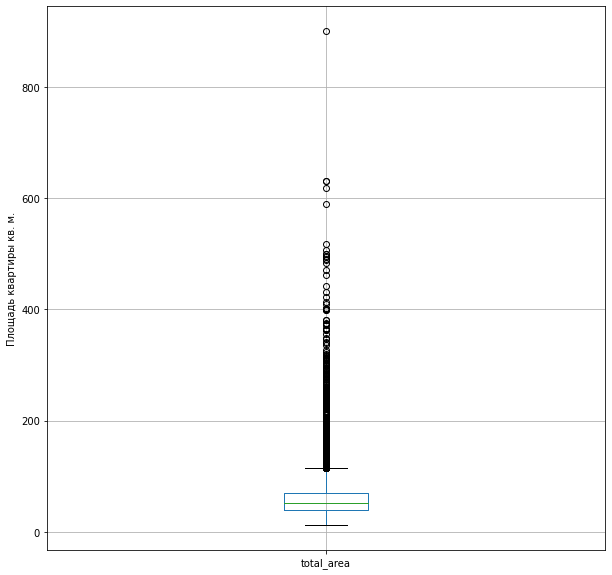

In [35]:
print('Диаграмма размаха общей площади квартиры')
data.boxplot(column=['total_area'], figsize=(10,10), grid=True)
plt.ylabel('Площадь квартиры кв. м.')
plt.show()

Необходимо сократить разброс значений, для этого убрать выбивающиеся значения (значения меньше 100):

In [36]:
good_data = data.query('total_area < 100')

Проверить разброс значений после изменений:

Диаграмма размаха общей площади квартиры после изменений


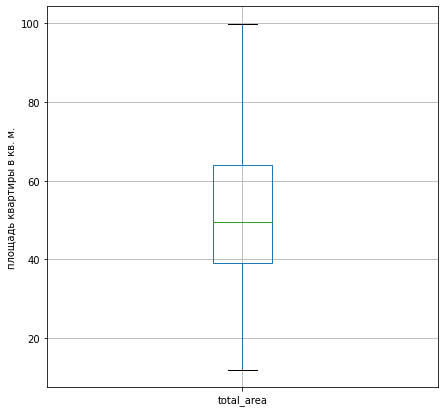

In [37]:
print('Диаграмма размаха общей площади квартиры после изменений')
good_data.boxplot(column=['total_area'], figsize=(7,7), grid=True)
plt.ylabel('площадь квартиры в кв. м.')
plt.show()

Построить диаграмму:

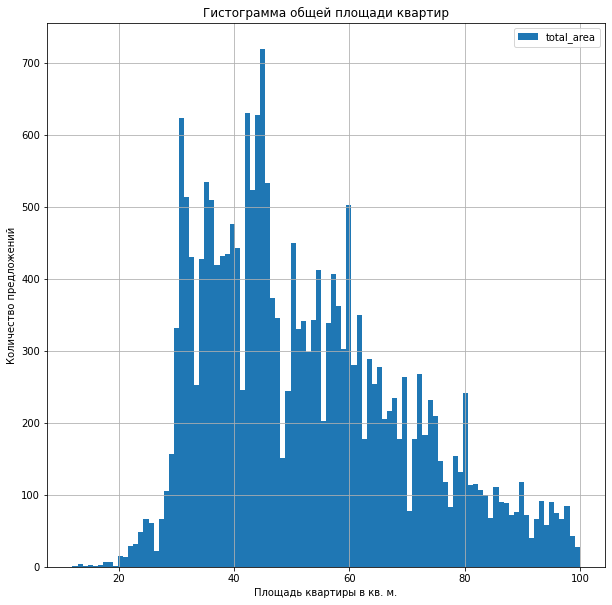

In [38]:
good_data.sort_values(by='total_area', ascending=True).plot(kind='hist', y='total_area',title='Гистограмма общей площади квартир',bins=100, figsize=(10,10), grid=True)

plt.xlabel('Площадь квартиры в кв. м.')
plt.ylabel('Количество предложений')
plt.show()

Построим гистограмму по столбцу 'living_area' для визуализации данных и дальнейшего анализа:

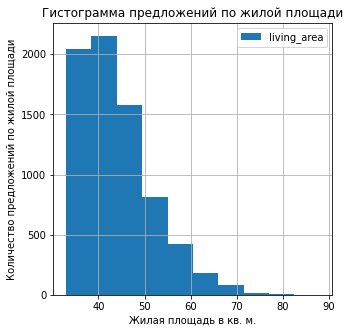

In [39]:
good_data.plot(kind='hist',y='living_area',grid=True, bins=10, figsize=(5,5),title='Гистограмма предложений по жилой площади')
plt.xlabel('Жилая площадь в кв. м.')
plt.ylabel('Количество предложений по жилой площади')
plt.show()

Построим гистограмму по столбцу 'kitchen_area' для визуализации данных и дальнейшего анализа:

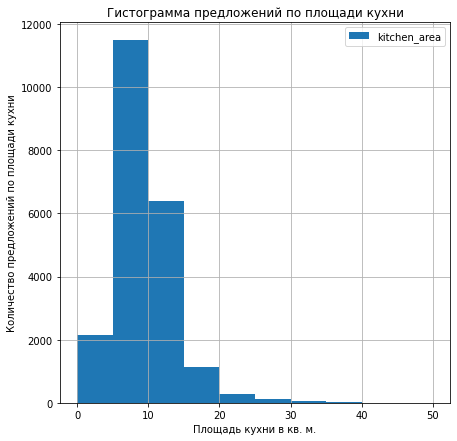

In [40]:
good_data.plot(kind='hist',y='kitchen_area',grid=True, bins=10, figsize=(7,7),title='Гистограмма предложений по площади кухни')
plt.xlabel('Площадь кухни в кв. м.')
plt.ylabel('Количество предложений по площади кухни')
plt.show() 

Цена объекта:

Диаграмма размаха цены объекта


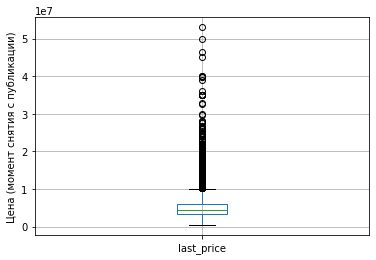

In [41]:
print('Диаграмма размаха цены объекта')
good_data.boxplot('last_price')
plt.ylabel('Цена (момент снятия с публикации)')
plt.show()

Необходимо сократить разброс значений, для этого убрать выбивающиеся значения (значения больше 9000000):

In [42]:
good_data = good_data.query('last_price < 9000000')

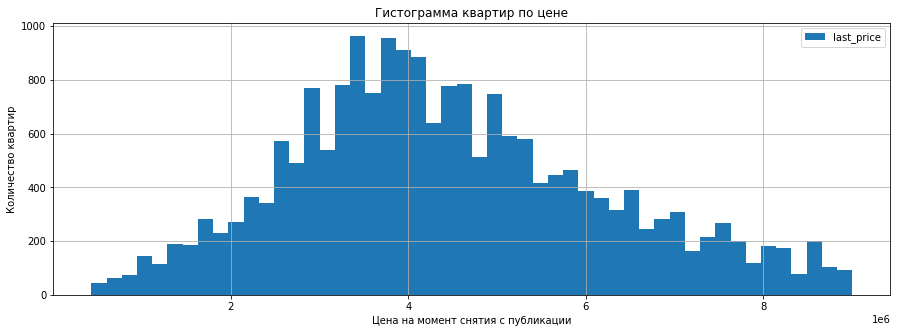

In [43]:
good_data.plot(kind='hist', y='last_price', title='Гистограмма квартир по цене',grid=True, bins=50, figsize=(15,5))
plt.ylabel('Количество квартир')
plt.xlabel('Цена на момент снятия с публикации')
plt.show()

Таким образом, пик предложений приходится на ценовой сегмент от 2 млн до 6 млн (макс. 4 млн).

Количество комнат:

Диаграмма размаха количества комнат


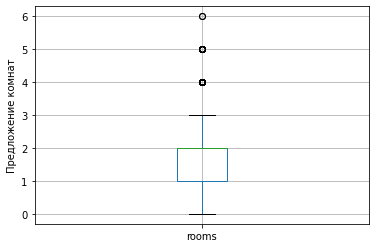

In [44]:
print('Диаграмма размаха количества комнат')
good_data.boxplot('rooms')
plt.ylabel('Предложение комнат')
plt.show()

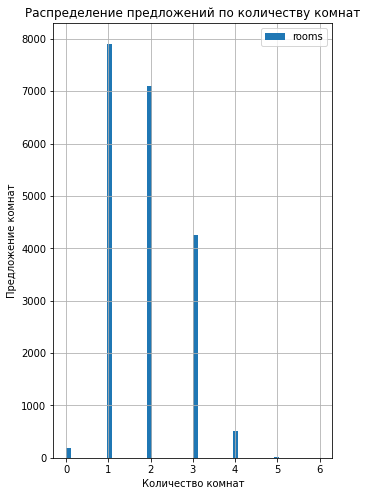

In [45]:
good_data.plot(kind='hist',y='rooms',title='Распределение предложений по количеству комнат',grid=True, bins=50, figsize=(5,8))
plt.xlabel('Количество комнат')
plt.ylabel('Предложение комнат')
plt.show()

Меньше предложений четырехкомнатных квартир, а однокомнатные более актуальны. Действительно, четырехкомнатные необходимы в основном большим семьям.

Диаграмма размаха высоты потолков


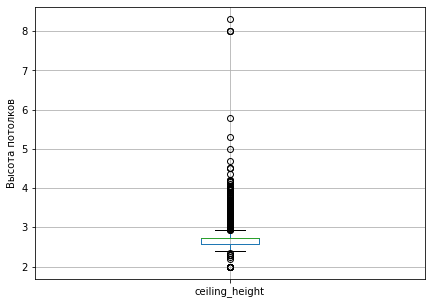

In [46]:
print('Диаграмма размаха высоты потолков')
good_data.boxplot(column=['ceiling_height'], figsize=(7,5), grid=True)

plt.ylabel('Высота потолков')
plt.show()

Необходимо сократить разброс значений, для этого убрать выбивающиеся значения (значения выше 2,9 и ниже 2,4):

In [47]:
good_data = good_data.query('ceiling_height < 2.9 and ceiling_height > 2.4')

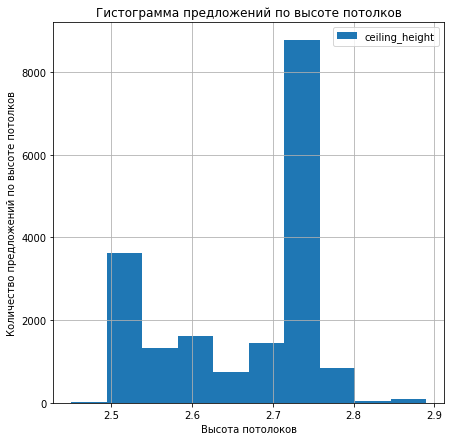

In [48]:
good_data.plot(kind='hist',y='ceiling_height',grid=True, bins=10, figsize=(7,7),title='Гистограмма предложений по высоте потолков')
plt.xlabel('Высота потолоков')
plt.ylabel('Количество предложений по высоте потолков')
plt.show()

Таким образом, актуальными являются квартиры за 2-6 млн, однокомнатные и двухкомнатные, с высотой потолков 2,7-3,1 м.

<AxesSubplot:>

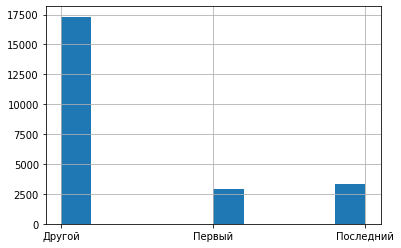

In [49]:
data['group_floor'].hist()

Влияние времени размещения на предложение о продаже квартиры:

Диаграмма размаха времени продажи квартиры


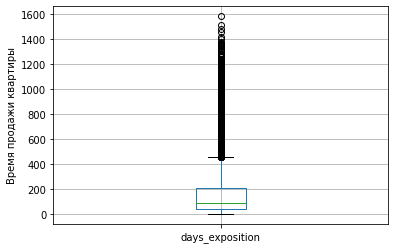

In [50]:
print('Диаграмма размаха времени продажи квартиры')
good_data.boxplot('days_exposition')
plt.ylabel('Время продажи квартиры')
plt.show()

Необходимо сократить разброс значений, для этого убрать выбивающиеся значения (значения больше 410), такие квартиры продаются слишком долго:

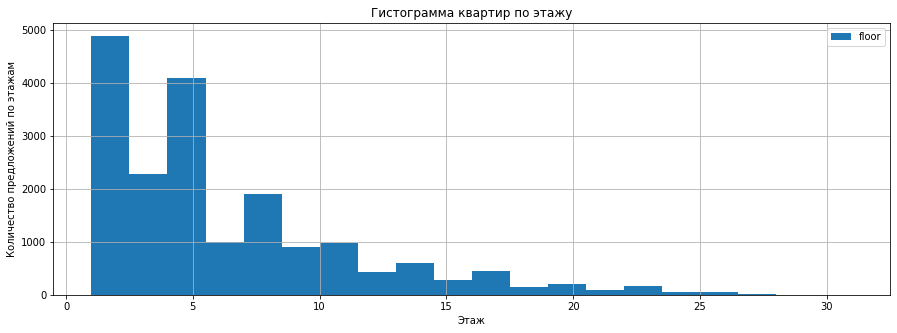

In [51]:
good_data.plot(kind='hist', y='floor', title='Гистограмма квартир по этажу',grid=True, bins=20, figsize=(15,5))
plt.ylabel('Количество предложений по этажам')
plt.xlabel('Этаж')
plt.show()

Наибольшее предложение по этажам с 1 по 6, так как возможно высотных зданий меньше.

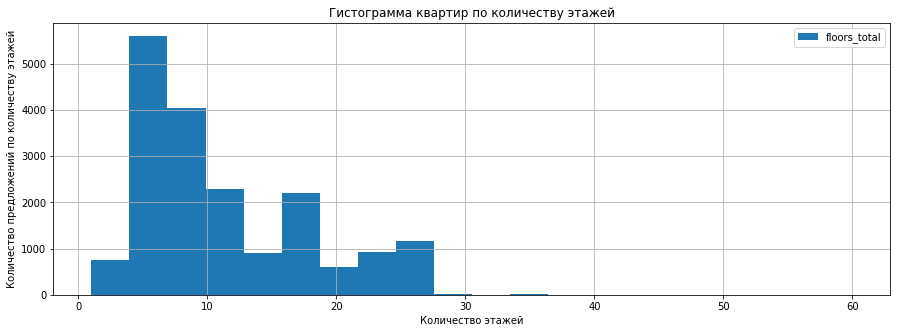

In [52]:
good_data.plot(kind='hist', y='floors_total', title='Гистограмма квартир по количеству этажей',grid=True, bins=20, figsize=(15,5))
plt.ylabel('Количество предложений по количеству этажей')
plt.xlabel('Количество этажей')
plt.show()

Действительно, предложений квартир в домах с количеством этажей 4-10 больше.

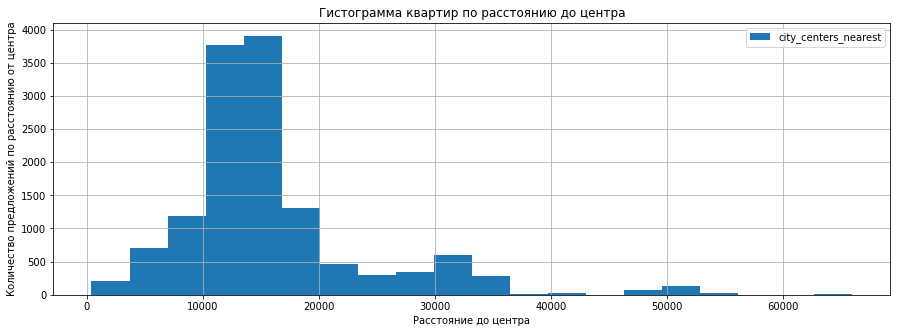

In [53]:
good_data.plot(kind='hist', y='city_centers_nearest', title='Гистограмма квартир по расстоянию до центра',grid=True, bins=20, figsize=(15,5))
plt.ylabel('Количество предложений по расстоянию от центра')
plt.xlabel('Расстояние до центра')
plt.show()

Больше всего предложений в 10-16 км от центра.

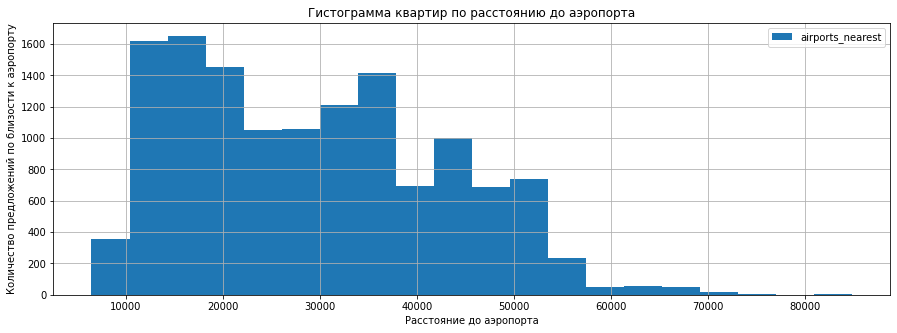

In [54]:
good_data.plot(kind='hist', y='airports_nearest', title='Гистограмма квартир по расстоянию до аэропорта',grid=True, bins=20, figsize=(15,5))
plt.ylabel('Количество предложений по близости к аэропорту')
plt.xlabel('Расстояние до аэропорта')
plt.show()

Наибольшее количество предложений в 10-37 км до ближайшего аэропорта.

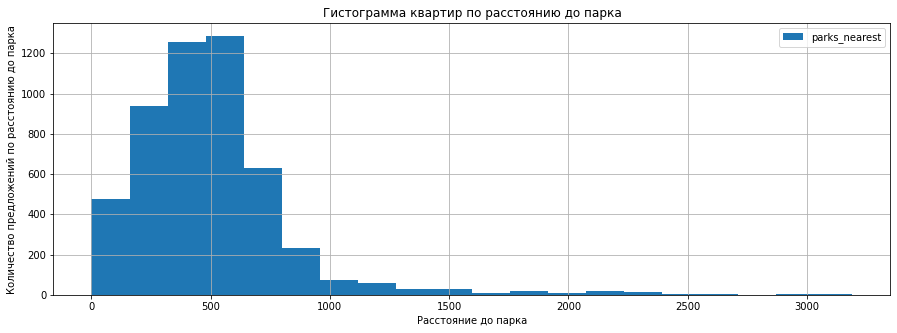

In [55]:
good_data.plot(kind='hist', y='parks_nearest', title='Гистограмма квартир по расстоянию до парка',grid=True, bins=20, figsize=(15,5))
plt.ylabel('Количество предложений по расстоянию до парка')
plt.xlabel('Расстояние до парка')
plt.show()

Количество предложений находится на пике в 300-600 м. до парка.

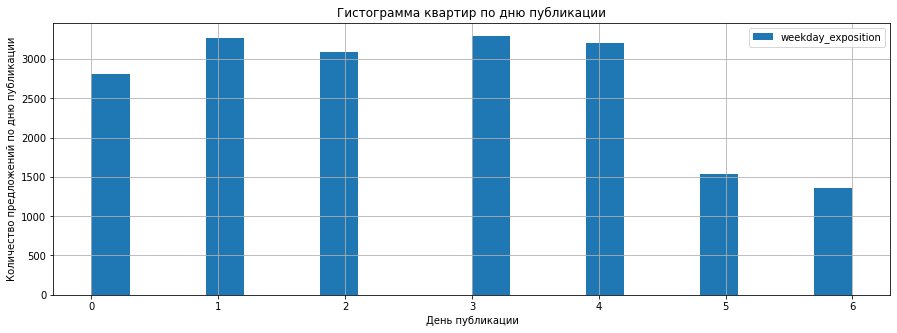

In [56]:
good_data.plot(kind='hist', y='weekday_exposition', title='Гистограмма квартир по дню публикации',grid=True, bins=20, figsize=(15,5))
plt.ylabel('Количество предложений по дню публикации')
plt.xlabel('День публикации')
plt.show()

Примерно равное количество объявлений наблюдается в будние дни, в сб-вс есть спад.

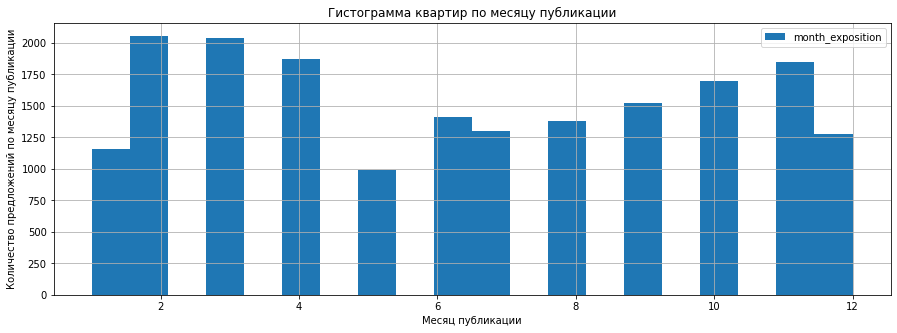

In [57]:
good_data.plot(kind='hist', y='month_exposition', title='Гистограмма квартир по месяцу публикации',grid=True, bins=20, figsize=(15,5))
plt.ylabel('Количество предложений по месяцу публикации')
plt.xlabel('Месяц публикации')
plt.show()

Меньше всего объявлений о продаже было подано в мае.

In [58]:
good_data = good_data.query('days_exposition < 410')

In [59]:
good_data['days_exposition'].agg(['mean','median'])

mean      108.097455
median     71.000000
Name: days_exposition, dtype: float64

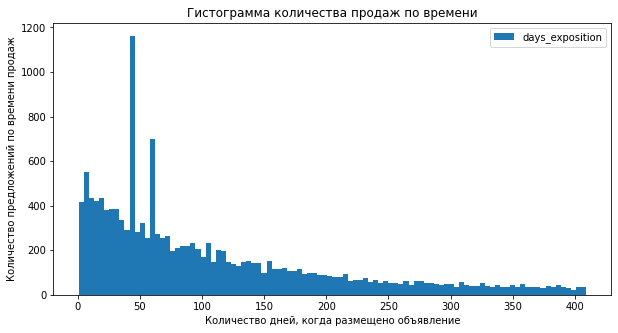

In [60]:
good_data.plot(kind='hist',y='days_exposition',title='Гистограмма количества продаж по времени', bins=100, figsize=(10,5))
plt.xlabel('Количество дней, когда размещено объявление')
plt.ylabel('Количество предложений по времени продаж')
plt.show()

Наибольшее количество предложений было размещено 40 и 60 дней.

Диаграмма размаха времени продажи квартиры


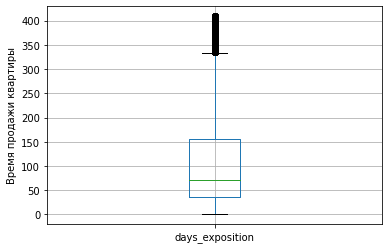

In [61]:
print('Диаграмма размаха времени продажи квартиры')
good_data.boxplot('days_exposition')
plt.ylabel('Время продажи квартиры')
plt.show()

Таким образом, быстрыми продажами считаются продажи 35-160 дней, а необычно долгими проданные после 325 дней.

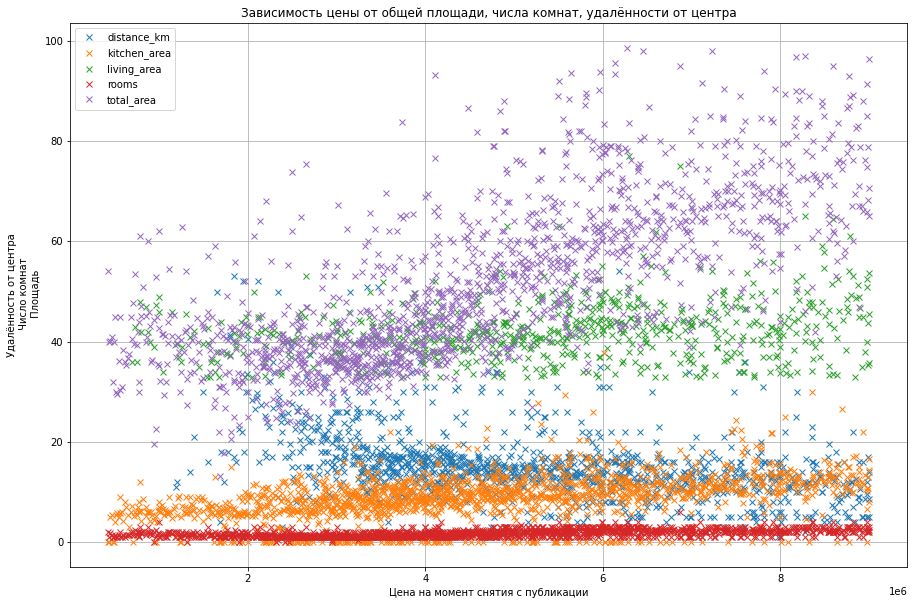

In [62]:
(good_data
    
     .pivot_table(index='last_price', values=['total_area', 'living_area', 'kitchen_area','rooms','distance_km'])
     .plot(style='x',grid=True, figsize=(15, 10), title='Зависимость цены от общей площади, числа комнат, удалённости от центра')
)
plt.xlabel('Цена на момент снятия с публикации')
plt.ylabel('Удалённость от центра\n Число комнат\n Площадь')
plt.show()

In [63]:
data['total_area'].corr(data['last_price'])

0.6536213939252808

Рассчитав кореляцию, можно сказать о существенной прямой связи между общей площадью и ценой квартир.

In [64]:
data['living_area'].corr(data['last_price'])

0.5590243971443853

Рассчитав кореляцию, можно сказать об имеющийся прямой связи между жилой площадью и ценой квартир.

In [65]:
data['kitchen_area'].corr(data['last_price'])

0.38733535213770753

В отличие от жилой и общей площади квартир площадь кухни имеет меньший небольшой показатель кореляции, однако небольшая связь имеется.

Зависимость цены от расположения квартиры:

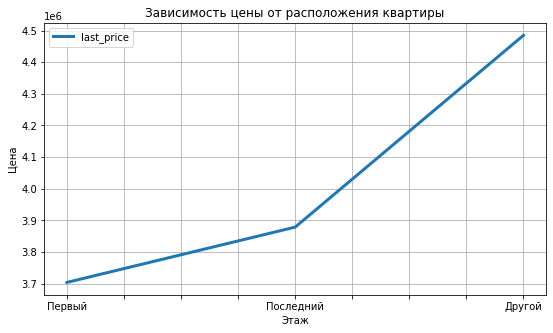

In [61]:
(good_data
     .pivot_table(index='group_floor', values='last_price').sort_values(by='last_price', ascending=True)
     .plot(grid=True, figsize=(9, 5),linewidth=3, title='Зависимость цены от расположения квартиры')
)
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.show()

In [62]:
data['floor'].corr(data['last_price'])

0.026841775356835604

Таким образом, коэффициент кореляции невелик, значит связь между данными величинами слабая.

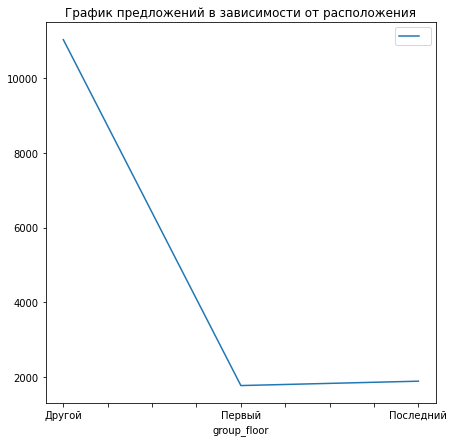

In [63]:
good_data.pivot_table(index='group_floor',values='last_price',aggfunc='count').plot(y='last_price', figsize=(7,7), label='', title='График предложений в зависимости от расположения')
plt.show()

Таким образом по количеству предложений и по цене наиболее актуальными являются все этажи кроме первого и последнего. Цена увеличивается с приближениям к центру.

Зависимость цены от даты, месяца, года размещения объявления:

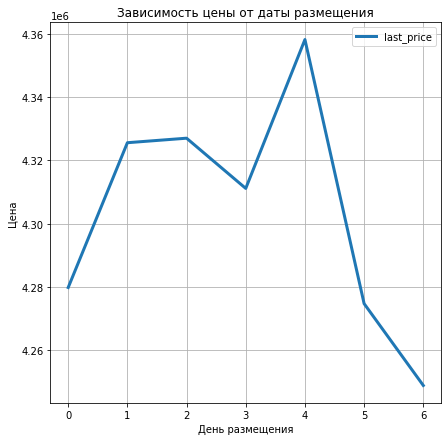

In [64]:
(good_data
    
     .pivot_table(index='weekday_exposition', values=['last_price'])
     .plot(grid=True, figsize=(7, 7),linewidth=3,title='Зависимость цены от даты размещения')
)
plt.xlabel('День размещения')
plt.ylabel('Цена')

plt.show()

In [65]:
data['weekday_exposition'].corr(data['last_price'])

0.0013569211122710745

Кореляция очень близка к 0, поэтому связь величин слабая.

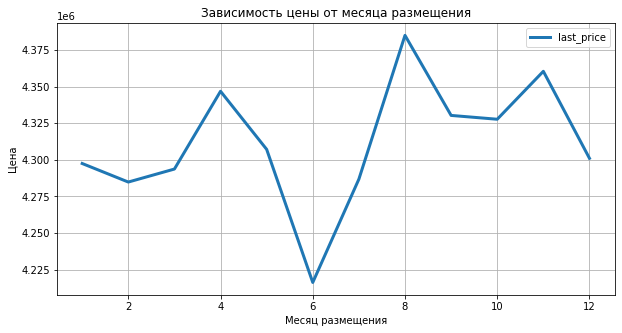

In [66]:
(good_data
    
     .pivot_table(index='month_exposition', values=['last_price'])
     .plot(grid=True, figsize=(10, 5),linewidth=3, title='Зависимость цены от месяца размещения')
)
plt.xlabel('Месяц размещения')
plt.ylabel('Цена')

plt.show()

In [67]:
data['month_exposition'].corr(data['last_price'])

0.0027259571647347564

Кореляция в зависимости цены от месяца размещения чуть больше дневной, однако зависимость все еще слабая.

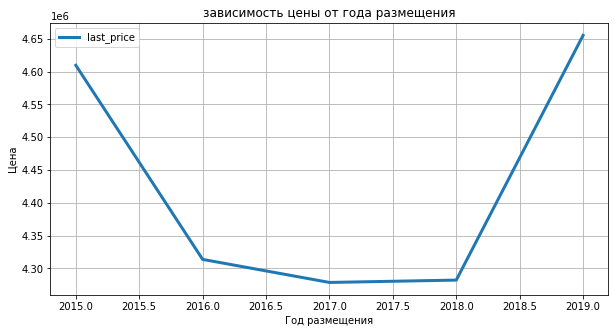

In [68]:
(good_data
    
     .pivot_table(index='year_exposition', values=['last_price'])
     .plot(grid=True, figsize=(10, 5),linewidth=3,title='зависимость цены от года размещения')
     
)
plt.xlabel('Год размещения')
plt.ylabel('Цена')

plt.show()

In [69]:
data['year_exposition'].corr(data['last_price'])

-0.04286415271361106

Кореляция отрицательная, что должно свительствовать о том, что чем выше значение года, тем ниже значение цены. Однако данная кореляция очень близка к нулю, поэтому нельзя сделать такой вывод, связь слабая

Таким образом, в четверг появляются объявления с наибольшей ценой. Также пик цен замечен в апреле. После пика цен в 2014 году, в 2016-2018 гг. замечен спад.

10 населённых пунктов с наибольшим числом объявлений:

In [70]:
data_10 = data.pivot_table(index='locality_name', values=['first_day_exposition'], aggfunc='count').sort_values(by='first_day_exposition', ascending=False).head(10)
data_10.columns=['count_ads']
data_10

,count_ads
locality_name,
санкт-петербург,15651
посёлок мурино,552
посёлок шушары,439
всеволожск,398
пушкин,369
колпино,338
посёлок парголово,327
гатчина,307
деревня кудрово,299


Наибольшее количество объявлений в городе "Санкт-Петербург".

In [71]:
data_10['cost_meter_mean'] = data.pivot_table(index='locality_name', values='price_square_meter', aggfunc='mean')
data_10_top=data_10.style.format({'cost_meter_mean':'{:.2f} ₽'})
data_10_top

,count_ads,cost_meter_mean
locality_name,,
санкт-петербург,15651,114868.43 ₽
посёлок мурино,552,85629.11 ₽
посёлок шушары,439,78550.88 ₽
всеволожск,398,68654.01 ₽
пушкин,369,103125.37 ₽
колпино,338,75424.15 ₽
посёлок парголово,327,90175.49 ₽
гатчина,307,68745.69 ₽
деревня кудрово,299,92473.09 ₽


Средняя цена за метр.

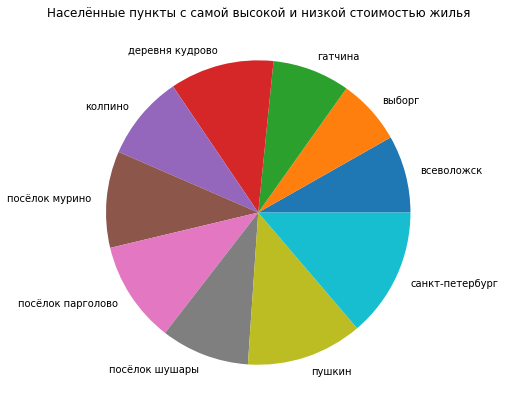

In [72]:
data_10.pivot_table(index='locality_name',values='cost_meter_mean').plot.pie(y='cost_meter_mean', figsize=(7,7), legend=False, label='', title='Населённые пункты с самой высокой и низкой стоимостью жилья')
plt.show()

Наибольшая средняя цена за метр наблюдается в Санкт-Петербурге и Пушкине, а наименьшая в Выборге, Всеволожске и Гатчине.

Количество квартир в Санкт-Петербурге:

In [73]:
loc_spb = data.loc[data['locality_name'] == 'санкт-петербург']
loc_spb['city_centers_nearest'].isna().sum()

60

Необходимо создать столбец с расстоянием до центра в километрах и округлить их до целых значений:

In [74]:
loc_spb=loc_spb.dropna(subset=['city_centers_nearest'])
loc_spb['centers_near_km']=(loc_spb['city_centers_nearest']/1000).round().astype(int)

Диаграмма размаха удалённости от центра


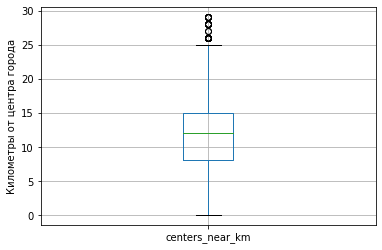

In [75]:
print('Диаграмма размаха удалённости от центра')
loc_spb.boxplot('centers_near_km')

plt.ylabel('Километры от центра города')
plt.show()

In [76]:
loc_spb = loc_spb.loc[loc_spb['centers_near_km'] < 26]

Расстояние больше 26 км от города нельзя считать центральным районом.

Средняя цена каждого километра:

In [77]:
cost_km_mean = loc_spb['last_price'].sum()/loc_spb['centers_near_km'].sum()
print('Средняя цена для каждого километра составляет {:.0f} ₽'.format(cost_km_mean))

Средняя цена для каждого километра составляет 698229 ₽


Зависимость цены от расстояния до центра:

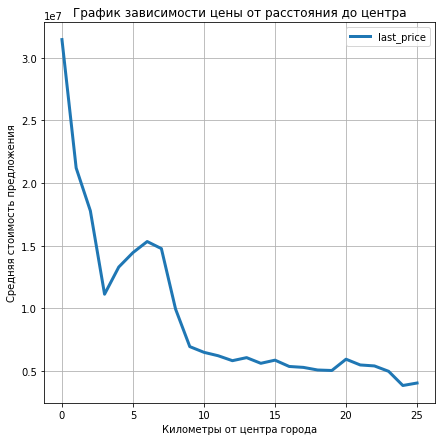

In [78]:
loc_spb.pivot_table(index='centers_near_km', values='last_price', aggfunc='mean').plot(figsize=(7,7), grid=True, linewidth=3, title='График зависимости цены от расстояния до центра')
plt.xlabel('Километры от центра города')
plt.ylabel('Средняя стоимость предложения')
plt.show()

In [79]:
loc_spb['centers_near_km'].corr(data['last_price'])

-0.2606006965317001

В данном случае можно говорить об обратной зависимости: чем больше километров от города, тем ниже цена.

Средняя стоимость предложения имела минимальные значения после 8-9 км от центра.

### Общий вывод

При анализе работы мною было выявлено огромное количество пропущенных даннных. Для обработки этих данных некоторые пропуски были заменены медианными или средними значениями, некоторые были удалены из-за предположительной ненадобности или заменены на 0 или None. Возможно эти пропуски были вызваны нежеланием респондентов отвечать или же неправильным заполнением ими же. Однако есть вероятность совершения ошибки автоматизированной системой, для предотвращения данных недочетов необходимо обратиться в техническую поддержку, специалистам данной сферы.

Были объявлены новые столбцы и рассчитаны новые данные:
•	цена одного квадратного метра;
•	день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
•	месяц публикации объявления;
•	год публикации объявления;
•	тип этажа квартиры (значения — «первый», «последний», «другой»);
•	расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

С помощью графиков были изучены следующие параметры объектов:

o	общая площадь (наибольшее количество предложений с 40-70 кв. м.) - прослеживается значительная прямая зависимость цены от общей площади квартиры;

o	жилая площадь(наибольшее количество предложений с 30-47 кв. м.) - прослеживается прямая зависимость цены от жилой площади квартиры;

o	площадь кухни(наибольшее количество предложений с 5-15 кв. м.) - прослеживается  прямая зависимость цены от площади кухни квартиры;

o	цена объекта(наибольшее количество предложений с ценой 2-6 млн.);

o	количество комнат(наибольшее количество предложений с 1-2 комнатами);

o	высота потолков(наибольшее количество предложений с 2,7-3,1 м);

o	этаж квартиры(наибольшее количество предложений с 1 по 6 этаж);

o	тип этажа квартиры («первый», «последний», «другой») (наибольшее количество предложений с "другим" этажем);

o	общее количество этажей в доме (наибольшее количество предложений с 4-10 этажами);

o	расстояние до центра города в метрах (наибольшее количество предложений с 10-16 км.);

o	расстояние до ближайшего аэропорта (наибольшее количество предложений с 10-37 км.);

o	расстояние до ближайшего парка (наибольшее количество предложений с 300-600 м.);

o	день и месяц публикации объявления (наименьшее количество предложений в субботу и воскресенье, в месяце - мае).

Исследовательский анализ данных показал, что наиболее актуальными для покупки являются 1-2 комнатные небольшие квартиры площадью 30-65 кв.м. за 2-6 млн., с высотой потолков 2,7-3,1 м. Цены зависят от близости к центру (8-9 км), цена за километр составила 698229. В апреле наблюдается пик цен,с 2018 года прослеживается заметный рост цен (однако кореляция показала ничтожную зависимость цены от этих данных). 
Максимальные цены на квартиры наблюдаются в Санкт_Петербурге, минимальные в  Выборге, Всеволожске и Гатчине.
